# Car Sale Data Analysis-Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
Car_Data = pd.read_csv('Car_Data.csv')

In [4]:
Car_Data

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [5]:
Car_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales in thousands   157 non-null    float64
 3   4-year resale value  157 non-null    object 
 4   Vehicle type         157 non-null    object 
 5   Price in thousands   157 non-null    object 
 6   Engine size          157 non-null    object 
 7   Horsepower           157 non-null    object 
 8   Wheelbase            157 non-null    object 
 9   Width                157 non-null    object 
 10  Length               157 non-null    object 
 11  Curb weight          157 non-null    object 
 12  Fuel capacity        157 non-null    object 
 13  Fuel efficiency      157 non-null    object 
 14  Latest Launch        157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 

In [6]:
Car_Data.shape

(157, 15)

In [7]:
columns_to_convert = ['4-year resale value', 'Price in thousands', 'Engine size', 
                      'Horsepower', 'Wheelbase', 'Width', 'Length', 
                      'Curb weight', 'Fuel capacity', 'Fuel efficiency']

In [8]:
Car_Data[columns_to_convert] = Car_Data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [9]:
Car_Data[columns_to_convert] = Car_Data[columns_to_convert].astype(float)

In [10]:
Car_Data.dtypes

Manufacturer            object
Model                   object
Sales in thousands     float64
4-year resale value    float64
Vehicle type            object
Price in thousands     float64
Engine size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb weight            float64
Fuel capacity          float64
Fuel efficiency        float64
Latest Launch           object
dtype: object

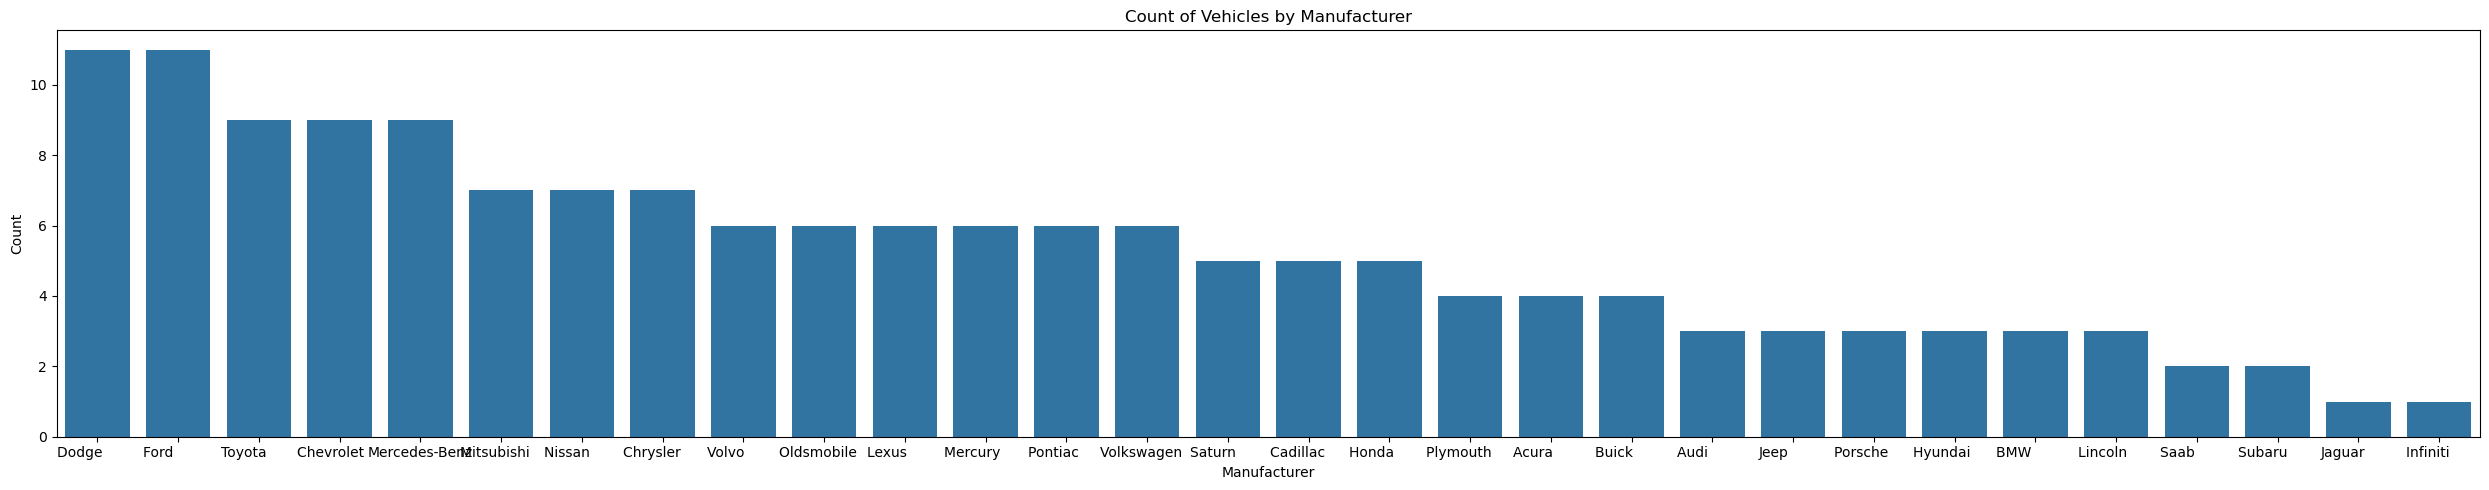

In [11]:
manufacturer_counts = Car_Data['Manufacturer'].value_counts()
manufacturer_counts_df = manufacturer_counts.reset_index()
manufacturer_counts_df.columns = ['Manufacturer', 'Count']
plt.figure(figsize=(25, 5))  # Adjust the size as needed
sns.barplot(x='Manufacturer', y='Count', data=manufacturer_counts_df)

# Add titles and labels
plt.title('Count of Vehicles by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()


##### Analysis: Maximum Sale generated by Dodge & Ford.

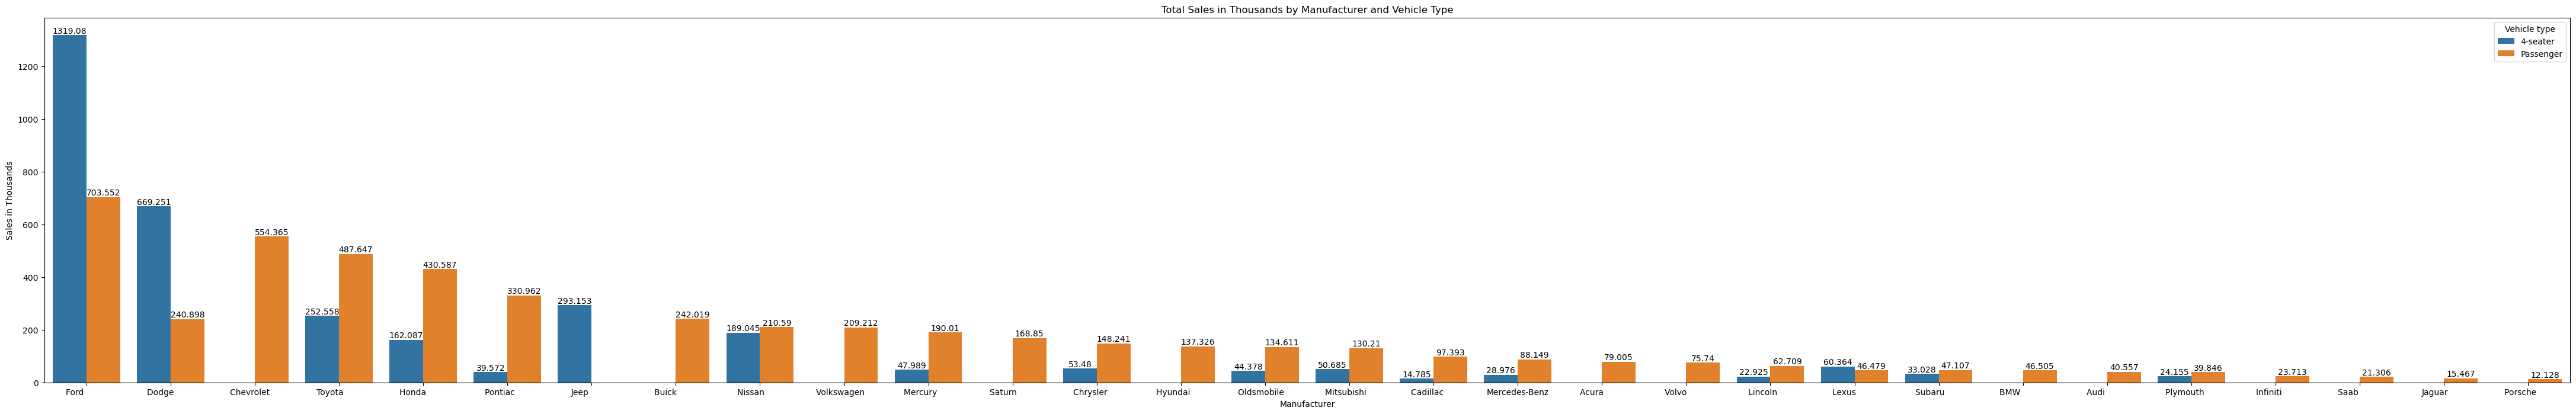

In [13]:
# Group data by 'Manufacturer' and 'Vehicle type', then calculate total sales
manufacturer_vehicle_sales = Car_Data.groupby(['Manufacturer', 'Vehicle type'])['Sales in thousands'].sum().reset_index()
manufacturer_vehicle_sales = manufacturer_vehicle_sales.sort_values(by='Sales in thousands', ascending=False)
plt.figure(figsize=(55, 8))
sns.barplot(x='Manufacturer', y='Sales in thousands', hue='Vehicle type', data=manufacturer_vehicle_sales)

plt.title('Total Sales in Thousands by Manufacturer and Vehicle Type')
plt.xlabel('Manufacturer')
plt.ylabel('Sales in Thousands')
for bars in plt.gca().containers:
    plt.gca().bar_label(bars)
plt.show()

##### Analysis: This plot will show the total Sales in Thousands for each manufacturer and split the sales further by vehicle type.

C:\Users\shubh\AppData\Local\Temp\ipykernel_15032\3323121538.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales in thousands', y='Vehicle type', data=vehicle_sales, palette='viridis')


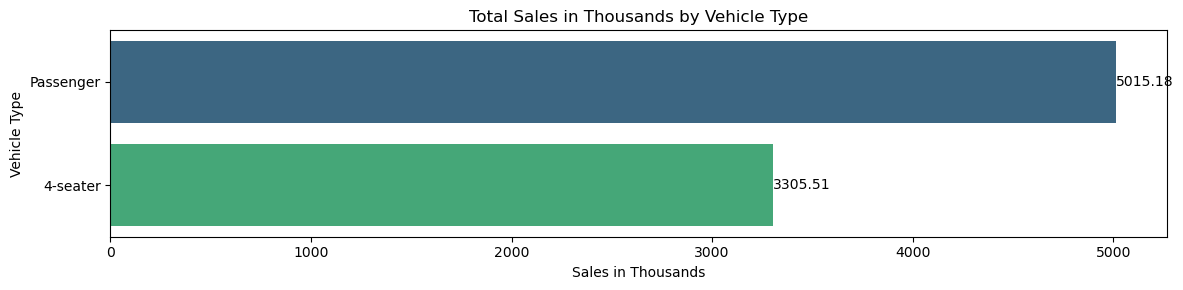

In [15]:
vehicle_sales = Car_Data.groupby('Vehicle type')['Sales in thousands'].sum().reset_index()
vehicle_sales = vehicle_sales.sort_values(by='Sales in thousands', ascending=False)

plt.figure(figsize=(12, 3)) 
# Create the barplot
sns.barplot(x='Sales in thousands', y='Vehicle type', data=vehicle_sales, palette='viridis')
plt.title('Total Sales in Thousands by Vehicle Type')
plt.xlabel('Sales in Thousands')
plt.ylabel('Vehicle Type')
for bars in plt.gca().containers:
    plt.gca().bar_label(bars)
plt.tight_layout()
plt.show()

##### Analysis: Passenger cars are sold more than 4 seater cars.

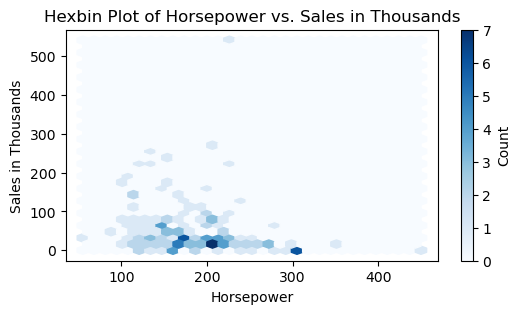

In [17]:
plt.figure(figsize=(6, 3))
plt.hexbin(Car_Data['Horsepower'], Car_Data['Sales in thousands'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Horsepower vs. Sales in Thousands')
plt.xlabel('Horsepower')
plt.ylabel('Sales in Thousands')
plt.show()

##### Analysis: Horsepower increases, sales tend to decrease slightly

#### End of Report